<b>Dataset:</b> Online Payments Fraud Detection Dataset
<br><b>Description:</b> Online payment fraud big dataset for testing and practice purpose
<br><b>Link:</b> https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Data preparation

In [2]:
# load dataset from csv
dataset = pd.read_csv('assets/payments.csv')
dataset.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
#get column names
column_names = dataset.columns

# print column names
print("Column names:")
print(", ".join(column_names))
print(column_names)
target_column = 'isFraud'
dataset.dropna();
dataset.drop(columns=["nameOrig", "nameDest"], inplace=True)

dataset.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], value=[2,4,1,5, 3], inplace=True)
# Splitting the data into training and test sets (e.g. 70% training, 30% test)
train_data, test_data = train_test_split(dataset, test_size=0.8, random_state=42)

# Obtaining training and testing functions and target variables
X_train = train_data.drop(columns=[target_column])
y_train = train_data[target_column]
X_test = test_data.drop(columns=[target_column])
y_test = test_data[target_column]

print("Count of training data:", len(X_train))
print("Count of test data:", len(X_test))

dataset.head(10)

Column names:
step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')
Count of training data: 1272524
Count of test data: 5090096


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,1,2,1864.28,21249.00,19384.72,0.0,0.00,0,0
2,1,4,181.00,181.00,0.00,0.0,0.00,1,0
3,1,1,181.00,181.00,0.00,21182.0,0.00,1,0
4,1,2,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,1,2,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,1,2,7107.77,183195.00,176087.23,0.0,0.00,0,0
7,1,2,7861.64,176087.23,168225.59,0.0,0.00,0,0
8,1,2,4024.36,2671.00,0.00,0.0,0.00,0,0
9,1,5,5337.77,41720.00,36382.23,41898.0,40348.79,0,0


### Model training

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

dt_clf= DecisionTreeClassifier()
lg_clf= LogisticRegression(max_iter=200)
rf_clf = RandomForestClassifier(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', lg_clf), ('dt', dt_clf), ('rf', rf_clf)],
    voting='soft'
)

for clf in (lg_clf, dt_clf, rf_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

voting_clf.fit(X_train, y_train)

# prediction with ensemble model
ensemble_predictions = voting_clf.predict(X_test)

LogisticRegression 0.998471148677746
DecisionTreeClassifier 0.9995864518075886
RandomForestClassifier 0.9996707331256621
VotingClassifier 0.9996728941850999


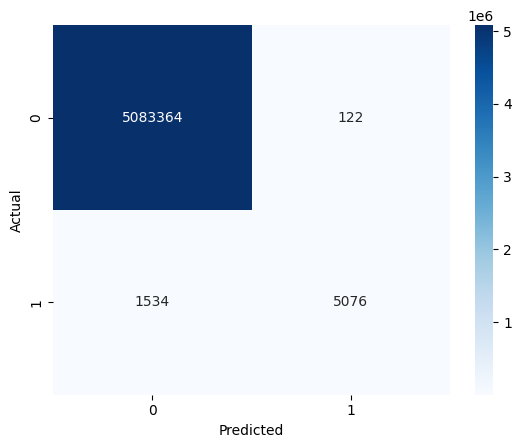

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculation of the confusion matrix
conf_matrix = confusion_matrix(y_test, ensemble_predictions)

# Rendering the confusion matrix using the seaborn library
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()